In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('tagsets')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/ironhack-final-project')

In [4]:
import you_nlp

In [5]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/raw_data/FRvideos_final_cleaned.csv")

In [6]:
data_nlp, frq = you_nlp.get_key_words(data, "fr")

In [7]:
stop_words = list(stopwords.words('french')) 

In [21]:
key_word_df, final_freq = you_nlp.create_keywords_df(data_nlp, frq, stop_words, "FR_FR")

In [12]:
final_freq

[('plus', 12550),
 ('vidéo', 12494),
 ('facebook', 8337),
 ('ici', 8189),
 ('chaîne', 7441),
 ('vidéos', 7309),
 ('cette', 6637),
 ('instagram', 6017),
 ('tous', 5942),
 ('nfacebook', 5907),
 ('faire', 5629),
 ('ntwitter', 5522),
 ('youtube', 4829),
 ('ninstagram', 4764),
 ('fait', 4518),
 ('the', 4100),
 ('monde', 4093),
 ('aussi', 3921),
 ('ça', 3821),
 ('snapchat', 3707),
 ('npour', 3603),
 ('bien', 3411),
 ('chaine', 3368),
 ('réseaux', 3318),
 ('abonner', 3250),
 ('tv', 3189),
 ('johnny', 3181),
 ('être', 3154),
 ('live', 3096),
 ('vie', 3094),
 ('sans', 3093),
 ('musique', 3080),
 ('hallyday', 3078),
 ('sociaux', 3062),
 ('merci', 3062),
 ('paris', 3033),
 ('toutes', 2993),
 ('très', 2866),
 ('français', 2833),
 ('comment', 2800),
 ('nmerci', 2772),
 ('video', 2757),
 ('abonnez', 2730),
 ('avoir', 2721),
 ('suivre', 2720),
 ('of', 2628),
 ('humour', 2612),
 ('recette', 2609),
 ('comme', 2588),
 ('nabonnez', 2583),
 ('nouvelle', 2531)]

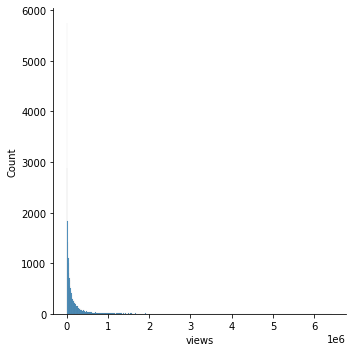

In [9]:
sns.displot(key_word_df["views"])

In [10]:
key_word_df_outl = you_nlp.remove_outliers(key_word_df)

category_id
4.0
30.0
14.0
views
136598.5
352454.75
-193939.25
likes
6280.5
15970.25
-9151.75
dislikes
194.0
497.0
-279.0
comment_count
577.0
1486.5
-821.5
likes_rate
0.06304035839996625
0.1729188972118702
-0.07924253638799476
dislikes_rate
0.0013297867882948997
0.00400180548229245
-0.0013173416708871497
plus
1.0
2.5
-1.5
vidéo
1.0
2.5
-1.5
facebook
1.0
2.5
-1.5
ici
chaîne
vidéos
cette
instagram
tous
nfacebook
faire
ntwitter
youtube
ninstagram
fait
the
monde
aussi
ça
snapchat
npour
bien
chaine
réseaux
abonner
tv
johnny
être
live
vie
sans
musique
hallyday
sociaux
merci
paris
toutes
très
français
comment
nmerci
video
abonnez
avoir
suivre
of
humour
recette
comme
nabonnez
nouvelle
0 rows have been removed, 0.0% in total


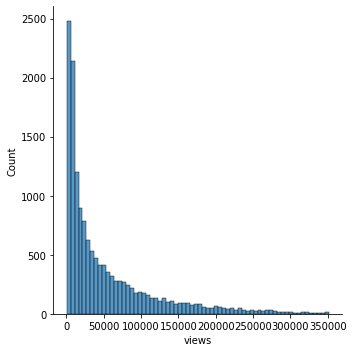

In [11]:
sns.displot(key_word_df_outl["views"])

In [13]:
key_word_df_outl["views"].describe()

count     14855.000000
mean      53330.711141
std       64710.364369
min         385.000000
25%        8313.000000
50%       26434.000000
75%       74031.000000
max      351864.000000
Name: views, dtype: float64

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


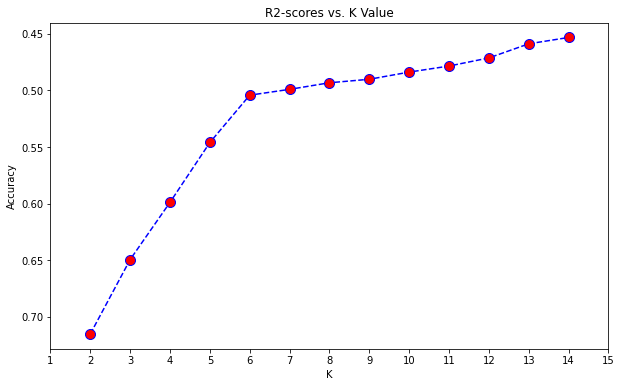

Please enter k:6


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.917067251783207
MSE: 69098036.796005
RMSE: 8312.522889953747
MAE: 2621.3751332987113
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.7912812861732664
MSE: 200970242.74036378
RMSE: 14176.397382281712
MAE: 4917.150898701135
-----------------------------
Filename Linear: FR_FR_Likes_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.1049386275017754
MSE: 745748633.4577019
RMSE: 27308.39858830433
MAE: 12280.663388399904
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.10254317323415163
MSE: 864139650.0452545
RMSE: 29396.252312926805
MAE: 12523.614736116233
-----------------------------
Filename Linear: FR_FR_Likes_linear.s

In [14]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df, "likes", "FR_FR_Likes")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


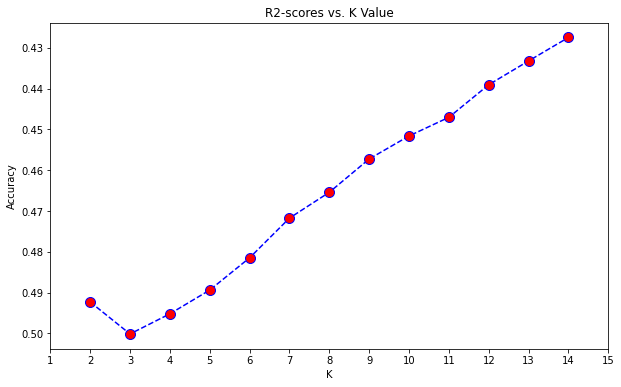

Please enter k:3


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.9090985038897279
MSE: 889387.8853867049
RMSE: 943.073637308723
MAE: 532.2325504051674
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.6202611828021707
MSE: 3671689.7661471125
RMSE: 1916.1653806879804
MAE: 1077.4573781328393
-----------------------------
Filename Linear: FR_FR_Likes_Out_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.22440206587458078
MSE: 7588515.437692044
RMSE: 2754.726018625454
MAE: 1847.5408518266747
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.20777780112114652
MSE: 7659986.307437932
RMSE: 2767.668026956617
MAE: 1868.1357751068936
-----------------------------
Filename Linear: FR_FR_Likes_Ou

In [15]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df_outl, "likes", "FR_FR_Likes_Out")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


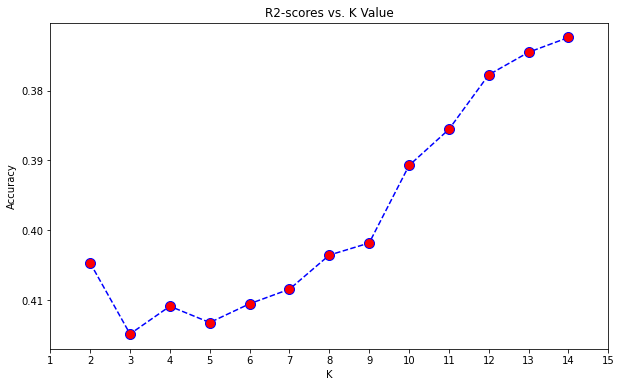

Please enter k:5


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.8593841165980947
MSE: 0.0002655038747082005
RMSE: 0.01629428963496723
MAE: 0.009828910261182862
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.5823528361123124
MSE: 0.0007833889144789179
RMSE: 0.027989085631347766
MAE: 0.01770880573933554
-----------------------------
Filename Linear: FR_FR_Likes_Rate_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.219587576135713
MSE: 0.0014735356873886343
RMSE: 0.03838666027917295
MAE: 0.02896186824651521
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.21695983630784632
MSE: 0.001468763676300579
RMSE: 0.03832445272017043
MAE: 0.028896211638216315
-----------------------------
Fi

In [16]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df, "likes_rate", "FR_FR_Likes_Rate")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


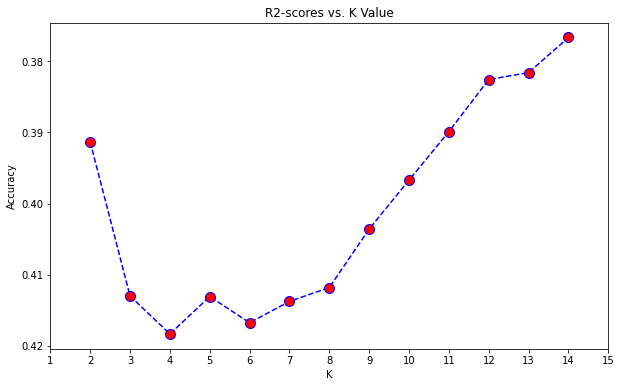

Please enter k:4


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.8761614830200855
MSE: 0.00018996944443655414
RMSE: 0.013782940340745661
MAE: 0.008370828874141248
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.573989474329722
MSE: 0.000679050764549634
RMSE: 0.02605860250569155
MAE: 0.016294267562057017
-----------------------------
Filename Linear: FR_FR_Likes_Rate_Out_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.26181376547152024
MSE: 0.0011323845947447159
RMSE: 0.03365092264329042
MAE: 0.026126070646572477
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.25093163173805333
MSE: 0.001193997372172698
RMSE: 0.03455426706172044
MAE: 0.02665345052587474
--------------------------

In [18]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df_outl, "likes_rate", "FR_FR_Likes_Rate_Out")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


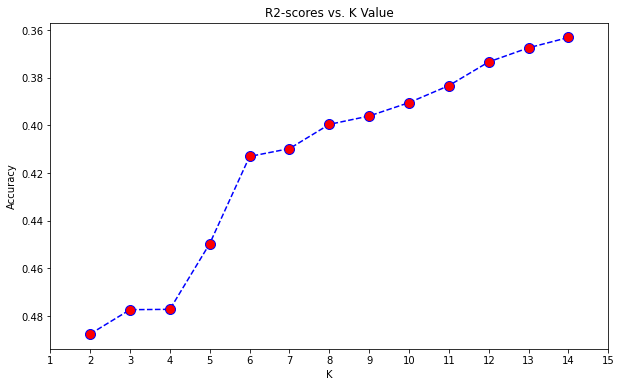

Please enter k:2


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.827156058684821
MSE: 24489500316.59777
RMSE: 156491.2148224231
MAE: 58230.61278511051
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.6314046437423371
MSE: 50909603601.019684
RMSE: 225631.5660563027
MAE: 99307.15598325526
-----------------------------
Filename Linear: FR_FR_Views_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.08413240177150327
MSE: 129765264932.71243
RMSE: 360229.46150018385
MAE: 179798.8625855582
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.07632581673696504
MSE: 127575906012.07991
RMSE: 357177.6952891654
MAE: 182314.85754312092
-----------------------------
Filename Linear: FR_FR_Views_linear

In [19]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df, "views", "FR_FR_Views")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


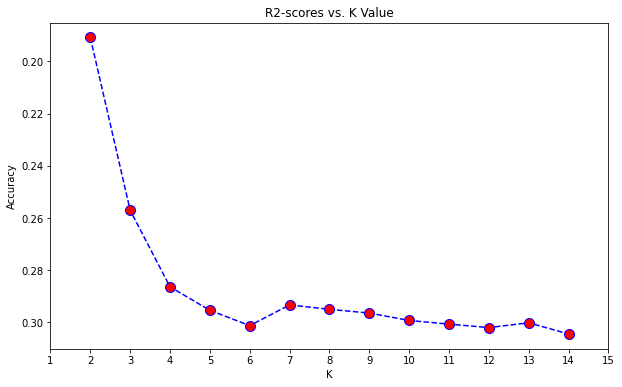

Please enter k:6


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.7575290555992221
MSE: 1038445094.0555388
RMSE: 32224.91418228354
MAE: 19085.303195312095
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.4425534201101675
MSE: 2208378266.7156925
RMSE: 46993.38535066071
MAE: 31021.41032919018
-----------------------------
Filename Linear: FR_FR_Views_Out_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.11715575702205172
MSE: 3781010855.553401
RMSE: 61489.924829628806
MAE: 44542.21839594324
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.11681388812599924
MSE: 3498826767.065527
RMSE: 59150.881371840325
MAE: 43280.873855708625
-----------------------------
Filename Linear: FR_FR_Views_

In [20]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df_outl, "views", "FR_FR_Views_Out")

In [ ]:
max_depth_choices=[3,4,5,6,7,8,9,10,None]
min_sample_split=[5 , 10, 15]
min_sample_leaf=[5, 10, 15]
max_samples=[0.2, 0.6, 0.8, 0.9]
random_state=[5, 10, 13]

In [ ]:
random_forest = {'max_depth': max_depth_choices,    
                'min_samples_split': min_sample_split,
                'min_samples_leaf': min_sample_leaf,
                'max_samples': max_samples,
                'random_state': random_state
               }